In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results_summary_numeric.csv")

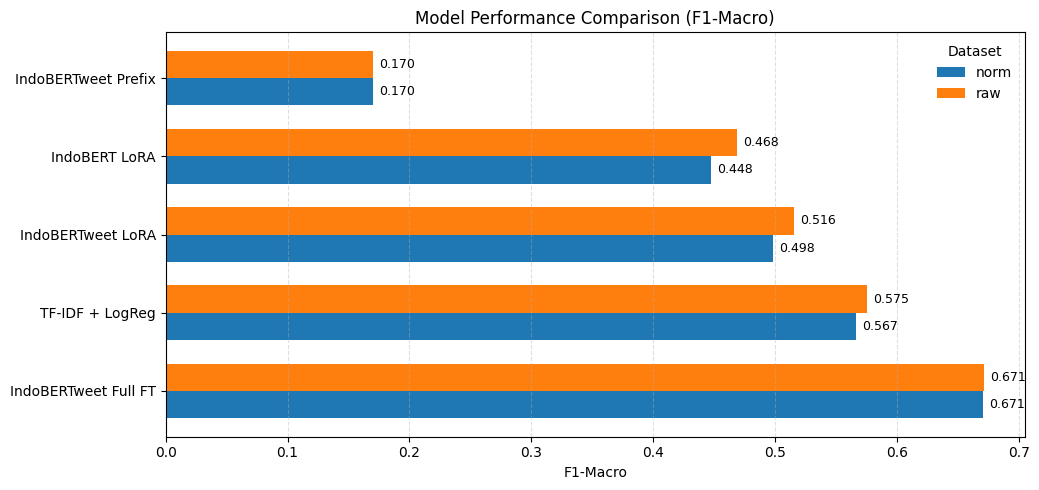

In [ ]:
models = df['model'].unique()
y = np.arange(len(models))
height = 0.35

df_norm = df[df['dataset'] == 'norm'].set_index('model').loc[models]
df_raw  = df[df['dataset'] == 'raw'].set_index('model').loc[models]

plt.figure(figsize=(10.5, 5))

bars_norm = plt.barh(
    y - height/2,
    df_norm['f1_macro_mean'],
    height,
    label='norm'
)

bars_raw = plt.barh(
    y + height/2,
    df_raw['f1_macro_mean'],
    height,
    label='raw'
)

def annotate_bars(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width + 0.005,
            bar.get_y() + bar.get_height()/2,
            f"{width:.3f}",
            va='center',
            fontsize=9
        )

annotate_bars(bars_norm)
annotate_bars(bars_raw)

plt.yticks(y, models)
plt.xlabel("F1-Macro")
plt.title("Model Performance Comparison (F1-Macro)")
plt.legend(title="Dataset", frameon=False)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

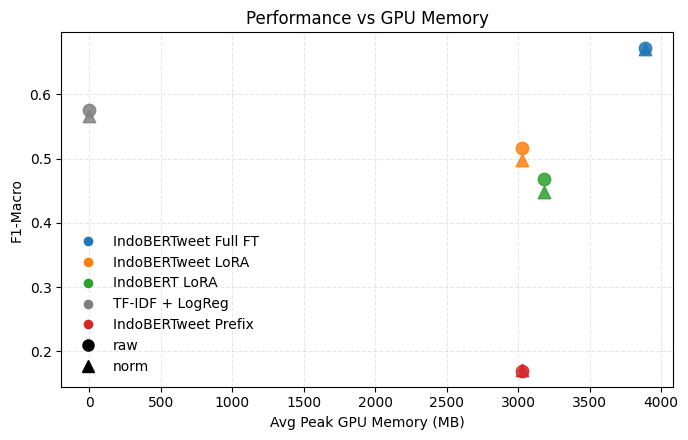

In [ ]:
model_colors = {
    "IndoBERTweet Full FT": "tab:blue",
    "IndoBERTweet LoRA": "tab:orange",
    "IndoBERT LoRA": "tab:green",
    "TF-IDF + LogReg": "tab:gray",
    "IndoBERTweet Prefix": "tab:red"
}

dataset_markers = {
    "raw": "o",
    "norm": "^"
}

plt.figure(figsize=(7, 4.5))

for _, row in df.iterrows():
    plt.scatter(
        row["gpu_mem_mean"],
        row["f1_macro_mean"],
        color=model_colors.get(row["model"], "black"),
        marker=dataset_markers.get(row["dataset"], "o"),
        s=80,
        alpha=0.85
    )

plt.xlabel("Avg Peak GPU Memory (MB)")
plt.ylabel("F1-Macro")
plt.title("Performance vs GPU Memory")

# Custom legends
from matplotlib.lines import Line2D

model_legend = [
    Line2D([0], [0], marker='o', color='w',
           label=model, markerfacecolor=color, markersize=8)
    for model, color in model_colors.items()
]

dataset_legend = [
    Line2D([0], [0], marker=marker, color='black',
           label=dataset, linestyle='None', markersize=8)
    for dataset, marker in dataset_markers.items()
]

plt.legend(
    handles=model_legend + dataset_legend,
    # title="Model / Dataset",
    frameon=False,
    loc="lower left"
)

plt.grid(axis="both", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


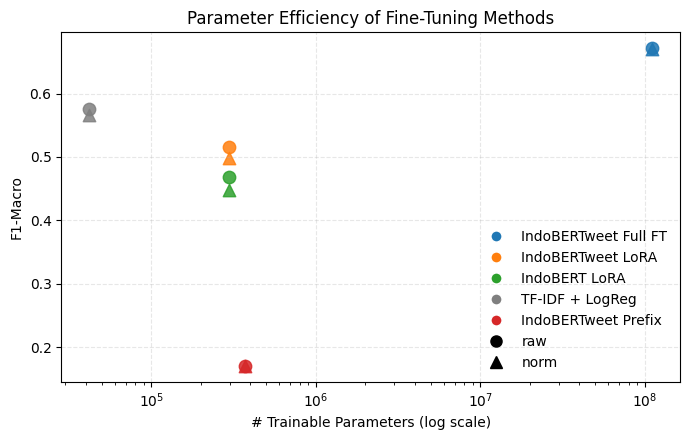

In [ ]:
plt.figure(figsize=(7, 4.5))

for _, row in df.iterrows():
    plt.scatter(
        row["trainable_params"],
        row["f1_macro_mean"],
        color=model_colors.get(row["model"], "black"),
        marker=dataset_markers.get(row["dataset"], "o"),
        s=80,
        alpha=0.85
    )

plt.xscale("log")
plt.xlabel("# Trainable Parameters (log scale)")
plt.ylabel("F1-Macro")
plt.title("Parameter Efficiency of Fine-Tuning Methods")

model_legend = [
    Line2D([0], [0], marker='o', color='w',
           label=model, markerfacecolor=color, markersize=8)
    for model, color in model_colors.items()
]

dataset_legend = [
    Line2D([0], [0], marker=marker, color='black',
           label=dataset, linestyle='None', markersize=8)
    for dataset, marker in dataset_markers.items()
]

plt.legend(
    handles=model_legend + dataset_legend,
    # title="Model / Dataset",
    frameon=False,
    loc="lower right"
)

plt.grid(axis="both", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
